In [106]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [107]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [108]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')

In [109]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [53]:
# precipitation_type

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [51]:
# Correct data manually

# Set extreme in 'precipitation.1' to nan
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

In [52]:
# set extreme in 'precipitation.2' to nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

In [66]:
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

In [54]:
WS100_rtu # precipitation.1/.2 Regenmenge differenziell

,air_temperature,precipitation,precipitation.1,precipitation.2,precipitation_intensity,precipitation_type
Time,,,,,,
2021-10-20 17:00:00,18.07,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:01:00,18.13,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:02:00,18.08,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:03:00,18.14,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:04:00,18.07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-10-20 16:17:00,12.39,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:18:00,12.34,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:19:00,12.38,0.0,0.0,0.0,0.0,0.0


In [73]:
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] != WS100_rtu['precipitation.1']].count()

225

In [ ]:
# index start
# '2021-10-20 17:00:00'
# index ende
# '2023-10-20 16:21:00'

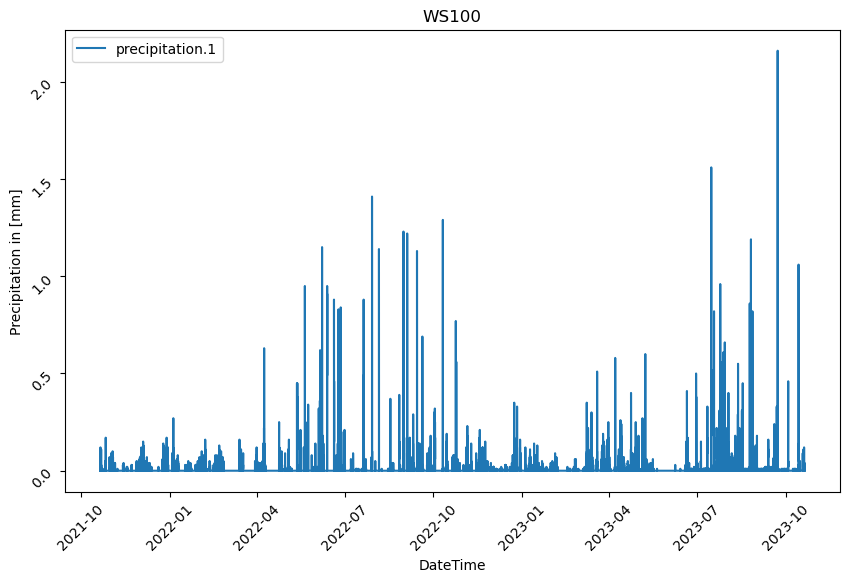

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(WS100_rtu.index, WS100_rtu['precipitation.1'], label='precipitation.1')
ax.set_title('WS100')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend()

plt.show()
plt.close()

In [ ]:
#start end '2020-10-23 09:00:00' : '2023-10-23 08:46:00'

In [78]:
WS300_rtu # precipitation.1 Regenmenge differenziell

,absolute_humidity,air_temperature,ambient_pressure,dewpoint,precipitation,precipitation.1,relative_humidity,absolute_humidity.1,air_temperature.1,ambient_pressure.1,...,precipitation.2,precipitation.3,relative_humidity.1,absolute_humidity.2,air_temperature.2,ambient_pressure.2,dewpoint.2,precipitation.4,precipitation.5,relative_humidity.2
Time,,,,,,,,,,,,,,,,,,,,,
2020-10-23 09:00:00,12.41,13.58,962.10,12.39,0.0,0.0,92.51,12.37,13.52,962.07,...,0.0,0.0,92.57,12.3,13.3,962.02,12.23,0.0,0.0,93.24
2020-10-23 09:01:00,12.37,13.58,962.08,12.34,0.0,0.0,92.21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:02:00,12.40,13.58,962.08,12.37,0.0,0.0,92.41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:03:00,12.42,13.58,961.99,12.40,0.0,0.0,92.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:04:00,12.48,13.63,962.01,12.48,0.0,0.0,92.77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 08:42:00,8.59,6.67,961.55,6.49,NaN,NaN,98.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:43:00,8.64,6.75,961.57,6.58,NaN,NaN,98.84,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:44:00,8.72,6.88,961.59,6.72,NaN,NaN,98.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# fct.sum_curve(WS300_rtu, 'precipitation.1', '2020-10-23 09:00:00', '2023-10-23 08:46:00')

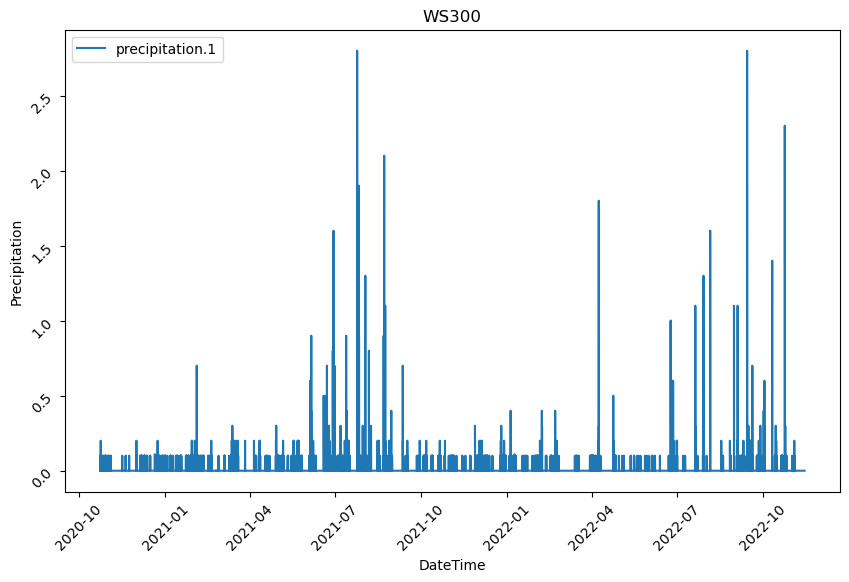

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

column = 'precipitation.1'

ax.plot(WS300_rtu.index, WS300_rtu[column], label=column)
ax.set_title('WS300')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend()

plt.show()
plt.close()

In [92]:
Raine_rtu

,Heizleistung,Niederschlagsintensität,Niederschlagsmenge,Heizleistung.1,Niederschlagsintensität.1,Niederschlagsmenge.1,Heizleistung.2,Niederschlagsintensität.2,Niederschlagsmenge.2
Time,,,,,,,,,
2022-11-03 11:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-03 11:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-03 11:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-03 11:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-03 11:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-22 17:09:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-22 17:10:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2024-04-22 17:11:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


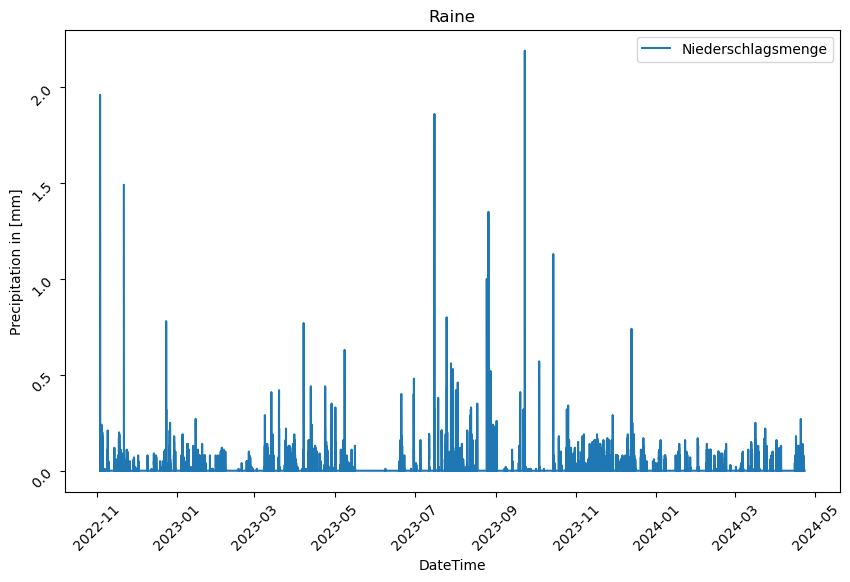

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))

column = 'Niederschlagsmenge'

ax.plot(Raine_rtu.index, Raine_rtu[column], label=column)
ax.set_title('Raine')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend()

plt.show()
plt.close()

In [110]:
L_pcp_rtu

,rr_07,rr_09,rr_10
date,,,
2020-01-01 00:01:00,0.0,0.0,0.0
2020-01-01 00:02:00,0.0,0.0,0.0
2020-01-01 00:03:00,0.0,0.0,0.0
2020-01-01 00:04:00,0.0,0.0,0.0
2020-01-01 00:05:00,0.0,0.0,0.0
...,...,...,...
2024-04-22 23:56:00,0.0,0.0,0.0
2024-04-22 23:57:00,0.0,0.0,0.0
2024-04-22 23:58:00,0.0,0.0,0.0


In [117]:
L_pcp_rtu['rr_10'].max()

2.96

In [118]:
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()].index

DatetimeIndex(['2021-07-24 19:39:00'], dtype='datetime64[ns]', name='date', freq=None)

In [113]:
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [116]:
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

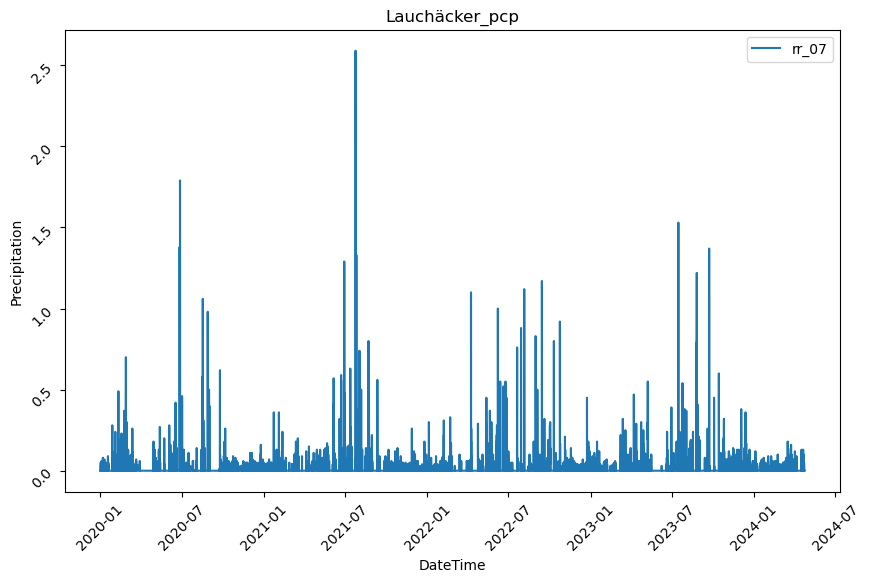

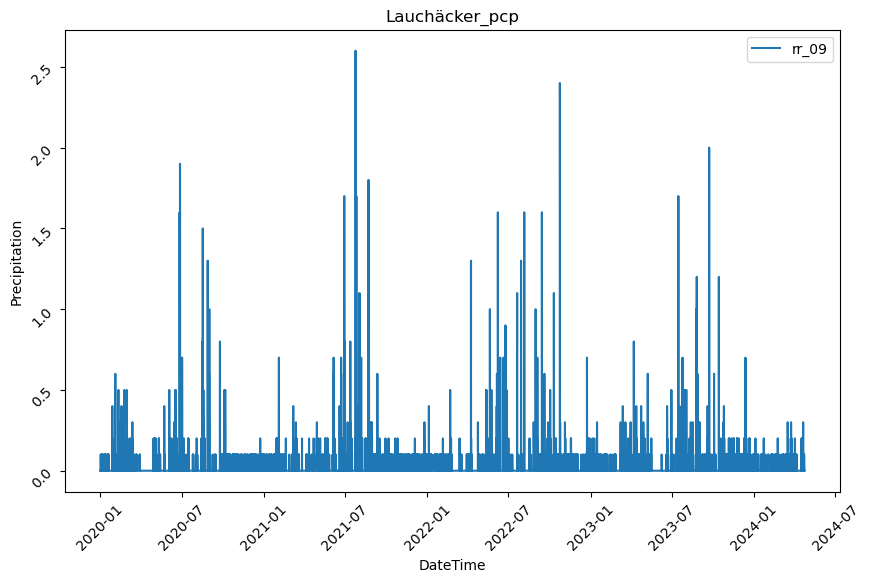

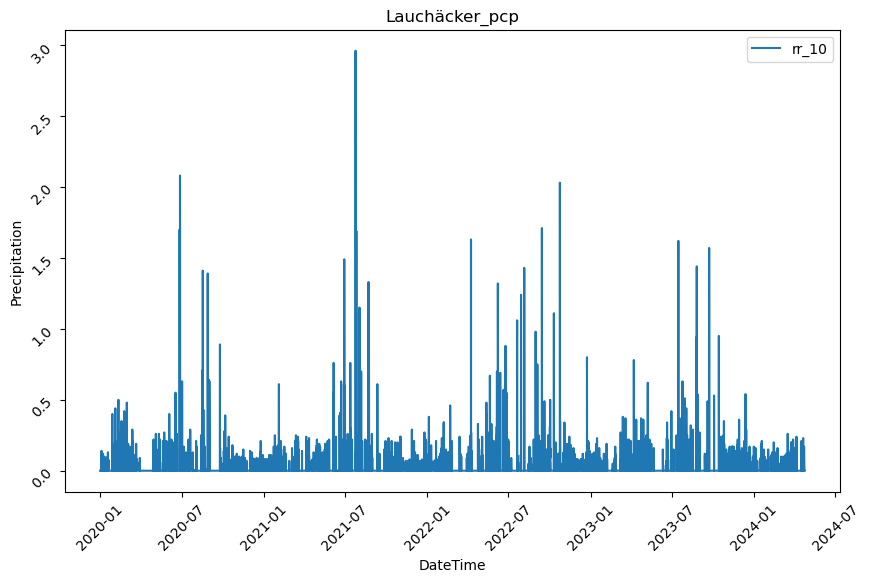

In [119]:
for column in L_pcp_rtu.columns:

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(L_pcp_rtu.index, L_pcp_rtu[column], label=column)
    ax.set_title('Lauchäcker_pcp')
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation')

    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.legend()

    plt.show()
    plt.close()